In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("uber.csv")
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [8]:
data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [12]:
missing_values= data.isnull().sum()
print("missing values in the dataset")
print(missing_values)

missing values in the dataset
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [47]:
data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"])


C:\Users\sanya\AppData\Local\Temp\ipykernel_16628\998624618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"])


In [15]:
data.dropna(inplace=True)
#or
data.fillna(data.mean(),inplace = True)

In [14]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

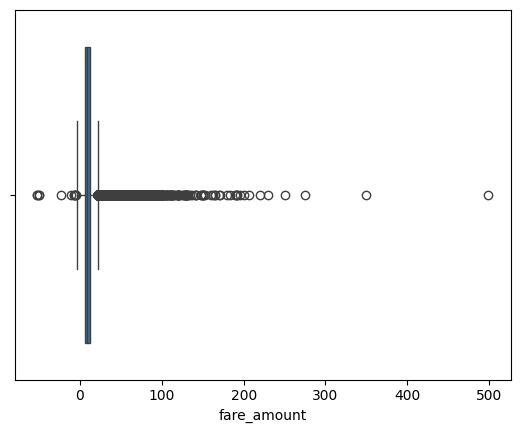

In [23]:
sns.boxplot(x=data['fare_amount'])
plt.show()

In [24]:
q1 = data['fare_amount'].quantile(0.25)
q3 = data['fare_amount'].quantile(0.75)
IQR = q3 - q1
lower_l = q1 - 1.5*IQR
upper_l = q3 + 1.5*IQR
print(lower_l,upper_l)

-3.75 22.25


<Axes: ylabel='fare_amount'>

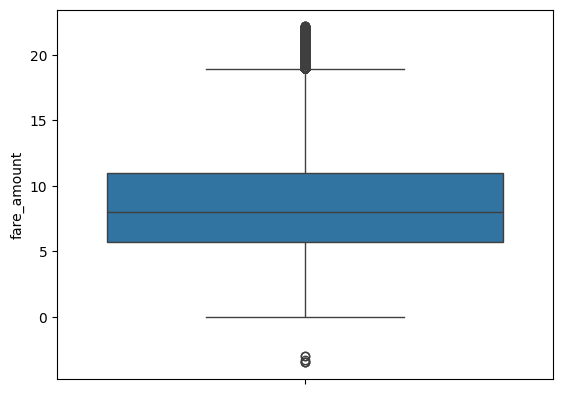

In [25]:
data = data[(data['fare_amount'] >= lower_l) & (data['fare_amount'] <= upper_l)]
sns.boxplot(data['fare_amount'])

In [28]:
data_cleaned = data.select_dtypes(include=[np.number])
cor = data_cleaned.corr()
print(cor)

                   Unnamed: 0  fare_amount  pickup_longitude  pickup_latitude  \
Unnamed: 0           1.000000    -0.000192          0.000490        -0.001194   
fare_amount         -0.000192     1.000000          0.000367         0.002618   
pickup_longitude     0.000490     0.000367          1.000000        -0.812047   
pickup_latitude     -0.001194     0.002618         -0.812047         1.000000   
dropoff_longitude    0.000835    -0.002413          0.835950        -0.767103   
dropoff_latitude    -0.000488     0.000589         -0.850574         0.684558   
passenger_count      0.002472     0.012618         -0.000751        -0.001604   

                   dropoff_longitude  dropoff_latitude  passenger_count  
Unnamed: 0                  0.000835         -0.000488         0.002472  
fare_amount                -0.002413          0.000589         0.012618  
pickup_longitude            0.835950         -0.850574        -0.000751  
pickup_latitude            -0.767103          0.684558 

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [33]:
data.columns.tolist()

['Unnamed: 0',
 'key',
 'fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [41]:
X = data[['pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']]
y = data[['fare_amount']]

In [49]:
X['pickup_datetime'] = pd.to_datetime(X['pickup_datetime'])
X['pickup_datetime'] = X['pickup_datetime'].astype('int64') / 10**9

C:\Users\sanya\AppData\Local\Temp\ipykernel_16628\1119266872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['pickup_datetime'] = pd.to_datetime(X['pickup_datetime'])
C:\Users\sanya\AppData\Local\Temp\ipykernel_16628\1119266872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['pickup_datetime'] = X['pickup_datetime'].astype('int64') / 10**9


In [43]:
# Check the size of X and y
print(len(X), len(y))

# Ensure you have enough samples or adjust test_size if necessary


182833 182833


In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 42)

In [51]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [53]:
y_predict = lr_model.predict(X_test)
y_predict

array([[ 9.92637453],
       [ 7.98506735],
       [ 9.24223991],
       ...,
       [10.01259051],
       [ 8.62939924],
       [ 8.04239695]])

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
rf_model = RandomForestRegressor(n_estimators=100,random_state = 42)
rf_model.fit(X_train,y_train)

C:\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [58]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([ 6.633, 15.049,  8.48 , ...,  7.702,  4.472,  8.713])

In [62]:
from sklearn.metrics import r2_score,mean_squared_error

In [67]:
r2_lr = r2_score(y_test,y_predict)
print("R2 score of Liner regression is:",r2_lr)

rms_lr = np.sqrt(mean_squared_error(y_test,y_predict))
print("Root mean squared error of linear regression is:",rms_lr)

R2 score of Liner regression is: 0.020894181297111514
Root mean squared error of linear regression is: 4.093350288791894


In [68]:
r2_lr = r2_score(y_test,y_pred_rf)
print("R2 score of Random forest regression is:",r2_lr)

rms_lr = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("Root mean squared error of Random forest regression is:",rms_lr)

R2 score of Random forest regression is: 0.7400588252409246
Root mean squared error of Random forest regression is: 2.109121670407262
